# COVID-19 Data Analysis and Visualization using Python

## A. Data Cleaning and Preparation

Import all main Python's library. We use numpy for numerical calculation and pandas for performing data analysis in our dataset.

In [1]:
import numpy as np
import pandas as pd

Import our visualization library. Here, we are using 3 types of Python's library for visualization, which is Matplotlib, Seaborn, and Folium. 

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Now we are ready to proceed to the next step. The first thing we want to do is exploring our COVID-19 dataset. So, let's import our dataset using pandas and view its first 5 rows.

In [4]:
df = pd.read_csv('dataset/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18816 entries, 0 to 18815
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              18816 non-null  int64  
 1   Country_Region  18816 non-null  object 
 2   Province_State  8000 non-null   object 
 3   Date            18816 non-null  object 
 4   ConfirmedCases  18816 non-null  float64
 5   Fatalities      18816 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 882.1+ KB


The first thing we going to do is adding the ConfirmedCases_Increase and Fatalities_Increase columns. If we look closely in ConfirmedCases and Fatalities columns, we could see that each data point represents the number of cases in those particular dates. Additionally, we want each data point to reflect the increasing number of cases in each day as well, so it can makes our upcoming analysis easier. 

In [5]:
# adding 2 more columns
df['ConfirmedCases_Increase'] = np.nan
df['Fatalities_Increase'] = np.nan

columns = ['ConfirmedCases', 'Fatalities']

df = df.set_index(['Country_Region', 'Province_State'])
df_diff = df[columns]

for i in df_diff.index.unique():
    first_data = df_diff.loc[i].iloc[0]
    df_temp = df_diff.loc[i].diff()
    
    df_temp['ConfirmedCases'].fillna(first_data['ConfirmedCases'], inplace=True)   
    df_temp['Fatalities'].fillna(first_data['Fatalities'], inplace=True)
    df.loc[i, 'ConfirmedCases_Increase'] = df_temp['ConfirmedCases'] 
    df.loc[i, 'Fatalities_Increase'] = df_temp['Fatalities']

# rename df columns
df.rename(columns={'ConfirmedCases': 'ConfirmedCases_Total', 'Fatalities': 'Fatalities_Total'}, inplace=True)

df.head()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\anaconda\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


Id        Date  ConfirmedCases_Total  \
Country_Region Province_State                                         
Afghanistan    NaN              1  2020-01-22                   0.0   
               NaN              2  2020-01-23                   0.0   
               NaN              3  2020-01-24                   0.0   
               NaN              4  2020-01-25                   0.0   
               NaN              5  2020-01-26                   0.0   

                               Fatalities_Total  ConfirmedCases_Increase  \
Country_Region Province_State                                              
Afghanistan    NaN                          0.0                      0.0   
               NaN                          0.0                      0.0   
               NaN                          0.0                      0.0   
               NaN                          0.0                      0.0   
               NaN                          0.0                      0.0   

                               Fatalities_Increase  
Country_Region Province_State                       
Afghanistan    NaN                             0.0  
               NaN                             0.0  
               NaN                             0.0  
               NaN                             0.0  
               NaN                             0.0

When analyzing a dataset, it is always a good idea to get the basic information of our dataset. So, let's do that using pandas function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18816 entries, ('Afghanistan', nan) to ('Zimbabwe', nan)
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       18816 non-null  int64  
 1   Date                     18816 non-null  object 
 2   ConfirmedCases_Total     18816 non-null  float64
 3   Fatalities_Total         18816 non-null  float64
 4   ConfirmedCases_Increase  18816 non-null  float64
 5   Fatalities_Increase      18816 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 939.6+ KB


From our basic analysis above, we could see that our dataset is comprised of 18816 entries or rows and have 6 columns. 
However, if we look closely, the Province_State column have 10,816 missing values. It is roughly 58% of its data is missing! Since it has so many missing values, let's modify Province_State column values by adding 'None' to null values. Moreover, eventhough Id has a correct datatypes and no missing values, we will eliminate it because Id does not have the significant meaning in our data.

In [7]:
# df.drop(['Province_State', 'Id'], axis=1, inplace=True)

df.reset_index(inplace=True)
df['Province_State'].fillna('None', inplace=True)
df.drop('Id', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18816 entries, 0 to 18815
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Region           18816 non-null  object 
 1   Province_State           18816 non-null  object 
 2   Date                     18816 non-null  object 
 3   ConfirmedCases_Total     18816 non-null  float64
 4   Fatalities_Total         18816 non-null  float64
 5   ConfirmedCases_Increase  18816 non-null  float64
 6   Fatalities_Increase      18816 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.0+ MB


That's it! We have eliminated Province_State and Id column. However, something is not right. Our Date column have object datatype. It is incorrect and we want to convert it into date format so it can make our further analysis much easier. 

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18816 entries, 0 to 18815
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country_Region           18816 non-null  object        
 1   Province_State           18816 non-null  object        
 2   Date                     18816 non-null  datetime64[ns]
 3   ConfirmedCases_Total     18816 non-null  float64       
 4   Fatalities_Total         18816 non-null  float64       
 5   ConfirmedCases_Increase  18816 non-null  float64       
 6   Fatalities_Increase      18816 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.0+ MB


This is a lot better! Now let's do some basic statistic into our dataset.

In [9]:
df.describe()

,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
count,18816.000000,18816.000000,18816.000000,18816.000000
mean,343.114052,12.672619,24.846088,1.125585
std,3580.120962,183.124487,260.992649,18.500090
min,0.000000,0.000000,-62.000000,-5.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,15.000000,0.000000,0.000000,0.000000
max,74386.000000,7503.000000,14840.000000,839.000000


Our dataset is not correct. The escalation of cases (ConfirmedCases_Increase) and deaths (Fatalities_Increase) could not be negative. So, we will modify the negative value into zero, so we assume that there is no escalation of those country in the particular date.

In [11]:
columns = ['ConfirmedCases_Increase', 'Fatalities_Increase']

df[columns] = np.where(df[columns] < 0, 0, df[columns])

Let's see the result below.

In [12]:
df.describe()

,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
count,18816.000000,18816.000000,18816.000000,18816.000000
mean,343.114052,12.672619,24.850925,1.126382
std,3580.120962,183.124487,260.991772,18.499979
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,15.000000,0.000000,0.000000,0.000000
max,74386.000000,7503.000000,14840.000000,839.000000


Now you can see that our data is optimized. Our dataset is not suffer from any mismatch values and anomaly. However, what if we want to see the distribution of all columns as well, such as Country and Date? So, let's add new command below.

In [13]:
df.describe(include='all')

,Country_Region,Province_State,Date,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
count,18816,18816,18816,18816.000000,18816.000000,18816.000000,18816.000000
unique,173,126,64,NaN,NaN,NaN,NaN
top,US,None,2020-01-25 00:00:00,NaN,NaN,NaN,NaN
freq,3456,10816,294,NaN,NaN,NaN,NaN
first,NaN,NaN,2020-01-22 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-03-25 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,343.114052,12.672619,24.850925,1.126382
std,NaN,NaN,NaN,3580.120962,183.124487,260.991772,18.499979
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


From this information, we could see that our dataset contains COVID-19 data from 22 January 2020 until 25 March 2020 for 173 countries worldwide. In other words, every country has 64 data which ranges from 22 January to 25 March. 

We also need to define Country as index using code below. Don't forget to display our final dataset using head function.

In [14]:
df.set_index(['Country_Region', 'Province_State'], inplace=True)
df.head()

Date  ConfirmedCases_Total  \
Country_Region Province_State                                    
Afghanistan    None           2020-01-22                   0.0   
               None           2020-01-23                   0.0   
               None           2020-01-24                   0.0   
               None           2020-01-25                   0.0   
               None           2020-01-26                   0.0   

                               Fatalities_Total  ConfirmedCases_Increase  \
Country_Region Province_State                                              
Afghanistan    None                         0.0                      0.0   
               None                         0.0                      0.0   
               None                         0.0                      0.0   
               None                         0.0                      0.0   
               None                         0.0                      0.0   

                               Fatalities_Increase  
Country_Region Province_State                       
Afghanistan    None                            0.0  
               None                            0.0  
               None                            0.0  
               None                            0.0  
               None                            0.0

## B. COVID-19 Trend Worldwide

We already look into our dataset distribution and basic statistic. It is time for us to visualize our data. First of all, we want to see the worldwide trend of this COVID-19 confirmed case and fatalities. Therefore, let's aggregate our data based on date.

In [15]:
df_case_worldwide = df[['Date','ConfirmedCases_Total']].groupby('Date').sum()
df_fatalities_worldwide = df[['Date','Fatalities_Total']].groupby('Date').sum()

df_fatalities_worldwide

,Fatalities_Total
Date,
2020-01-22,17.0
2020-01-23,18.0
2020-01-24,26.0
2020-01-25,42.0
2020-01-26,56.0
...,...
2020-03-21,12973.0
2020-03-22,14659.0
2020-03-23,16498.0


And then, let's visualize it using a line chart.

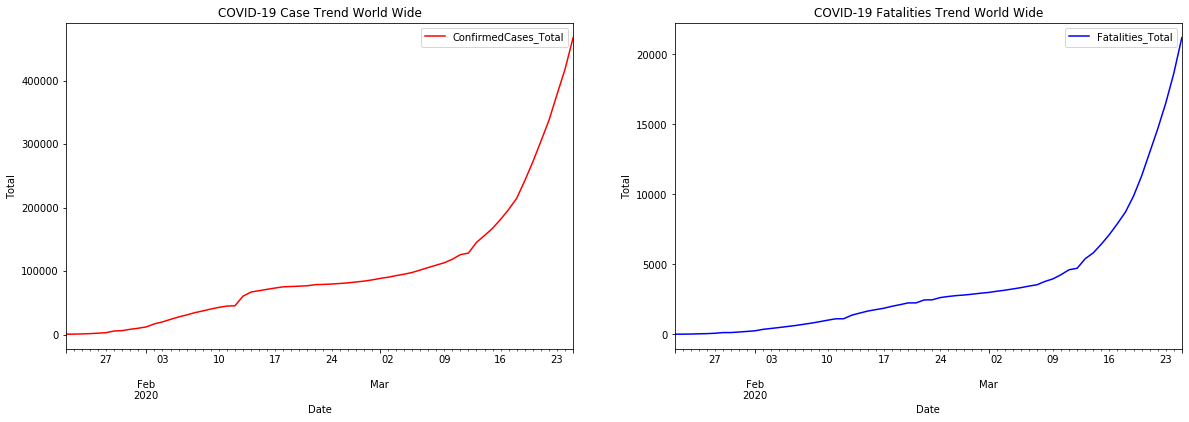

In [16]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_case_worldwide.plot(kind='line', color='red', ax=ax0, figsize=(20,6))
ax0.set_title('COVID-19 Case Trend World Wide')
ax0.set_xlabel('Date')
ax0.set_ylabel('Total')

df_fatalities_worldwide.plot(kind='line', color='blue', ax=ax1, figsize=(20,6))
ax1.set_title('COVID-19 Fatalities Trend World Wide')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total')

plt.show()

This figure gives us an interesting result. The number of confirmed cases and fatalities have increased over period of time. And it began to increased significantly in the first to second week of March 2020. That is when COVID-19 case has been recognized all over the world and people starts to concern about it. See the Google Trend image below.

In [72]:
from IPython.core.display import display, HTML
display(HTML('<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/2152_RC02/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"covid 19","geo":"","time":"2020-01-28 2020-03-28"},{"keyword":"corona","geo":"","time":"2020-01-28 2020-03-28"},{"keyword":"covid","geo":"","time":"2020-01-28 2020-03-28"}],"category":0,"property":""}, {"exploreQuery":"date=2020-01-28%202020-03-28&q=covid%2019,corona,covid","guestPath":"https://trends.google.com:443/trends/embed/"}); </script>'))

Moreover, both Confirmed Cases and Fatalities have very similar graph. This indicates that these 2 variables have a similar distribution and positive correlation. To proof this hypothesis, let's add more visualization to these 2 variables.

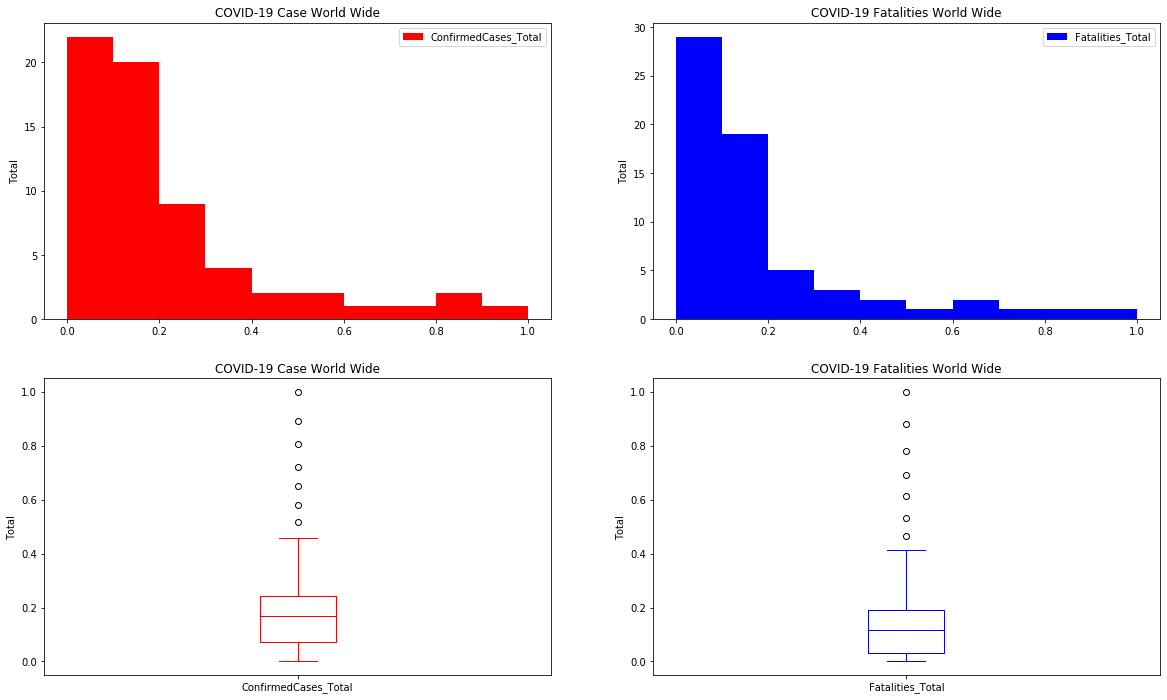

In [17]:
# Data normalization
df_case_worldwide = (df_case_worldwide - df_case_worldwide.min()) / (df_case_worldwide.max() - df_case_worldwide.min())
df_fatalities_worldwide = (df_fatalities_worldwide - df_fatalities_worldwide.min()) / (df_fatalities_worldwide.max() - df_fatalities_worldwide.min())

fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_case_worldwide.plot(kind='hist', color='red', ax=ax0, figsize=(20,12))
ax0.set_title('COVID-19 Case World Wide')
ax0.set_ylabel('Total')

df_fatalities_worldwide.plot(kind='hist', color='blue', ax=ax1, figsize=(20,12))
ax1.set_title('COVID-19 Fatalities World Wide')
ax1.set_ylabel('Total')

df_case_worldwide.plot(kind='box', color='red', ax=ax2, figsize=(20,12))
ax2.set_title('COVID-19 Case World Wide')
ax2.set_ylabel('Total')

df_fatalities_worldwide.plot(kind='box', color='blue', ax=ax3, figsize=(20,12))
ax3.set_title('COVID-19 Fatalities World Wide')
ax3.set_ylabel('Total')

plt.show()

Based on our graph above, we could conclude that COVID-19 case has similar distribution compared to COVID-19 fatalities. Our next step is adding scatter plot to these 2 variables to test whether they are correlated. We will use seaborn library to perform this visualization.

Text(0.5, 1.0, 'Correlation between ConfirmedCases and Fatalities')

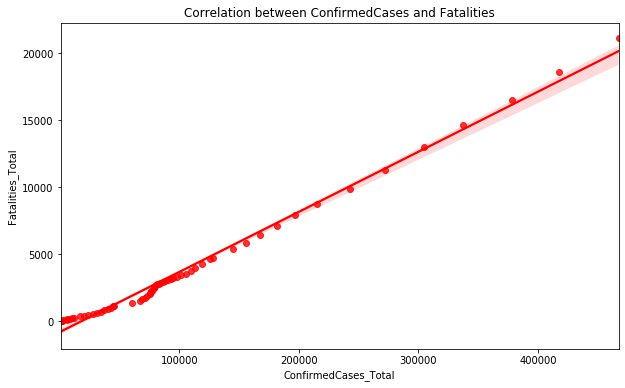

In [19]:
df_worldwide = df.groupby('Date').sum()

plt.figure(figsize=(10, 6))
ax = sns.regplot(x='ConfirmedCases_Total', y='Fatalities_Total', data=df_worldwide, color='red')
ax.set_title('Correlation between ConfirmedCases and Fatalities')

In [20]:
df_worldwide.corr()

,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
ConfirmedCases_Total,1.000000,0.995615,0.932731,0.954725
Fatalities_Total,0.995615,1.000000,0.946867,0.970273
ConfirmedCases_Increase,0.932731,0.946867,1.000000,0.985731
Fatalities_Increase,0.954725,0.970273,0.985731,1.000000


From graph above, we can conclude that Confirmed Cases and Fatalities have a very strong correlation. This means that the number of deceased people (fatalities) is still very high and right now (until 25 March 2020), most likely there are no very effective treatment or cure to stop the number of deceased people because of COVID-19.

## C. Does Country's Location Affect the COVID-19 Spreadness?

Now, let's go ahead and perform our second analysis of our dataset. In this section, we want to know what caused the speed of COVID-19 spreadness all over the world. In order to do that, we need to know when is the first COVID-19 occurence in China. 

In [21]:
df_china = df.loc['China']
df_china.head()

,Date,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
Province_State,,,,,
Anhui,2020-01-22,1.0,0.0,1.0,0.0
Anhui,2020-01-23,9.0,0.0,8.0,0.0
Anhui,2020-01-24,15.0,0.0,6.0,0.0
Anhui,2020-01-25,39.0,0.0,24.0,0.0
Anhui,2020-01-26,60.0,0.0,21.0,0.0


We could see that China suffers for COVID-19 disease from 22 January. Next, let's find out the first case in others country outside of China. Then, we sorted it based on date to get the earliest COVID-19 disease. 

In [23]:
df.reset_index(inplace=True)
df_outside_china = df[df['Country_Region'] != 'China']
df_outside_china.set_index(['Country_Region', 'Province_State'], inplace=True)

# set index again
df.set_index(['Country_Region', 'Province_State'], inplace=True)

# performing aggregation
df_outside_china = df_outside_china[df_outside_china['ConfirmedCases_Total'] != 0]
df_outside_china = df_outside_china.groupby(['Country_Region']).min()

# sorting based on dates
df_outside_china.sort_values(by='Date', ascending=True, inplace=True)
df_outside_china.head(10)

,Date,ConfirmedCases_Total,Fatalities_Total,ConfirmedCases_Increase,Fatalities_Increase
Country_Region,,,,,
"Korea, South",2020-01-22,1.0,0.0,0.0,0.0
Japan,2020-01-22,2.0,0.0,0.0,0.0
Taiwan*,2020-01-22,1.0,0.0,0.0,0.0
Thailand,2020-01-22,2.0,0.0,0.0,0.0
Vietnam,2020-01-23,2.0,0.0,0.0,0.0
Singapore,2020-01-23,1.0,0.0,0.0,0.0
France,2020-01-24,1.0,0.0,0.0,0.0
Nepal,2020-01-25,1.0,0.0,0.0,0.0
Malaysia,2020-01-25,3.0,0.0,0.0,0.0


From table above, we now know that the earliest COVID-19 cases around the world (outside China) is mostly in Asia country. This indicates that countries located near China is more susceptible and prone to COVID-19. 

Now, let's see the number of cases of the 6 earliest country. In this case, we will use the ConfirmedCases_Increase to calculate the total 

In [26]:
df_top6 = df.loc[['Korea, South', 'Japan', 'Taiwan*', 'Thailand', 'Vietnam', 'Singapore']]
df_top6 = df_top6[['ConfirmedCases_Increase']].groupby(['Country_Region']).sum()
df_top6

,ConfirmedCases_Increase
Country_Region,
Japan,1307.0
"Korea, South",9137.0
Singapore,631.0
Taiwan*,235.0
Thailand,934.0
Vietnam,141.0


Let's compute the mean of confirmed cases around the world.

In [28]:
mean = df['ConfirmedCases_Increase'].mean()
mean

24.85092474489796

Now, let's visualize that data using bar chart so we can analyse easily.

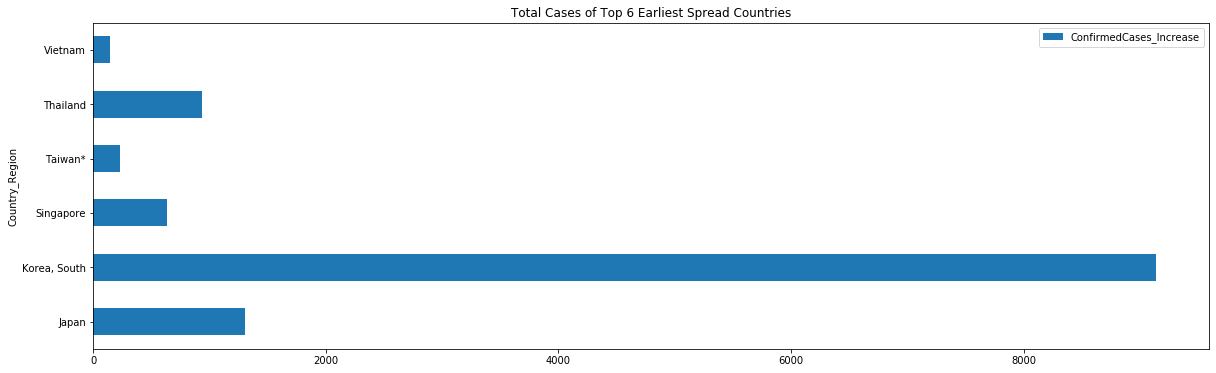

In [29]:
df_top6.plot(kind='barh', figsize=(20,6))
plt.title('Total Cases of Top 6 Earliest Spread Countries')
plt.show()

From above table and chart, we could see that the total cases among the top 6 earliest spread countries is not similar, especially for South Korea. However, these number of cases is considered very high because all of them are above the global mean (24.850).

In [73]:
# df_earliest = df.loc[['China', 'Korea, South', 'Japan', 'Taiwan*']]
# df_earliest = df_earliest[['Date', 'ConfirmedCases']].groupby(['Country_Region', 'Date']).sum()
# df_earliest.reset_index(inplace=True)

# df_earliest = df_earliest.pivot(index='Date',columns='Country_Region')

# df_earliest

# df_earliest.plot(kind='area', figsize=(15,8))
# plt.title('COVID-19 Trend in Top 4 Earliest Spread Countries')
# plt.xlabel('Date')
# plt.ylabel('Total')

Our next step is visualizing the COVID-19's escalation in the top 6 earliest countries. So let's the new dataframes.

In [32]:
df_korea = df.loc['Korea, South']
df_korea = df_korea[['Date', 'ConfirmedCases_Increase']].groupby(['Date']).sum()
df_korea.reset_index(inplace=True)

df_japan = df.loc['Japan']
df_japan = df_japan[['Date', 'ConfirmedCases_Increase']].groupby(['Date']).sum()
df_japan.reset_index(inplace=True)

df_taiwan = df.loc['Taiwan*']
df_taiwan = df_taiwan[['Date', 'ConfirmedCases_Increase']].groupby(['Date']).sum()
df_taiwan.reset_index(inplace=True)

df_thailand = df.loc['Thailand']
df_thailand = df_thailand[['Date', 'ConfirmedCases_Increase']].groupby(['Date']).sum()
df_thailand.reset_index(inplace=True)

# calculate date difference between each date and first case date
df_korea['Days'] = (df_korea['Date'] - df_outside_china.loc['Korea, South', 'Date']).dt.days
df_korea.set_index('Days', inplace=True)
df_korea.drop('Date', axis=1, inplace=True)

df_japan['Days'] = (df_japan['Date'] - df_outside_china.loc['Japan', 'Date']).dt.days
df_japan.set_index('Days', inplace=True)
df_japan.drop('Date', axis=1, inplace=True)

df_taiwan['Days'] = (df_taiwan['Date'] - df_outside_china.loc['Taiwan*', 'Date']).dt.days
df_taiwan.set_index('Days', inplace=True)
df_taiwan.drop('Date', axis=1, inplace=True)

df_thailand['Days'] = (df_thailand['Date'] - df_outside_china.loc['Thailand', 'Date']).dt.days
df_thailand.set_index('Days', inplace=True)
df_thailand.drop('Date', axis=1, inplace=True)

df_korea

,ConfirmedCases_Increase
Days,
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
59,147.0
60,162.0
61,0.0


And le's visualize it using line chart.

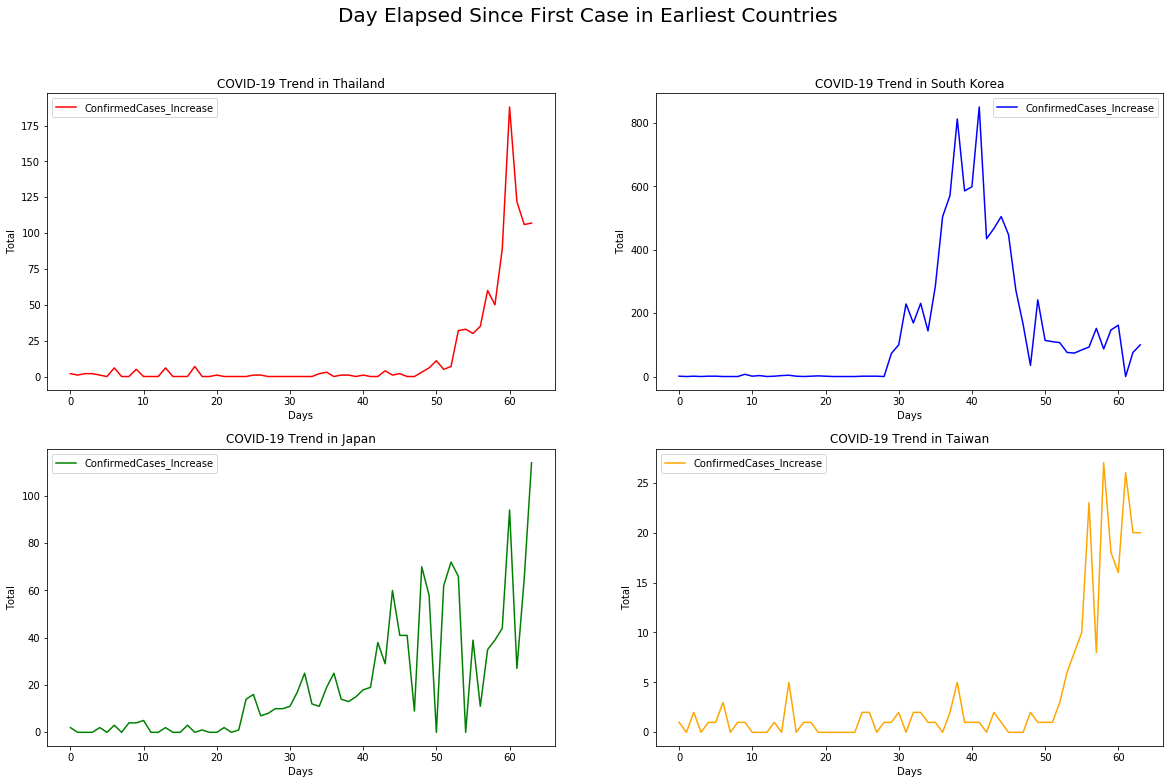

In [33]:
# NUMBER OF CASES SINCE COUNTRY'S FIRST CASE

fig = plt.figure()
fig.suptitle('Day Elapsed Since First Case in Earliest Countries', fontsize=20)

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_korea.plot(kind='line', color='blue', ax=ax1, figsize=(20,12))
ax1.set_title('COVID-19 Trend in South Korea')
ax1.set_ylabel('Total')

df_japan.plot(kind='line', color='green', ax=ax2, figsize=(20,12))
ax2.set_title('COVID-19 Trend in Japan')
ax2.set_ylabel('Total')

df_taiwan.plot(kind='line', color='orange', ax=ax3, figsize=(20,12))
ax3.set_title('COVID-19 Trend in Taiwan')
ax3.set_ylabel('Total')

df_thailand.plot(kind='line', color='red', ax=ax0, figsize=(20,12))
ax0.set_title('COVID-19 Trend in Thailand')
ax0.set_ylabel('Total')

plt.show()

The above chart gives us interesting results. It seems that COVID-19 cases starts to increase significantly in 30 to 50 days since its first case. This facts indicates that the number of days plays an important roles to predicting the number of cases in each country. 

Secondly, the chart also shows us that South Korea handling COVID-19's spreadness very effectively because the escalation is much lower compared to few weeks ago.

## D. Relationships with Country's Total Population

In order to find the correlation, we need to add the country's population data around the world. We will use the World Bank population data for this purpose. Let's import it and show its first 5 rows.

In [34]:
df_pop = pd.read_csv('dataset/population_data.csv')
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


We just need the country name and 2018 columns to get the current population data. 

In [35]:
columns = ['Country Name', '2018']
df_pop = df_pop[columns]

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   2018          262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


And then, let's get all countries confirmed cases since the beginning dates of dataset.

In [41]:
df.reset_index(inplace=True)

df_all_country = df[['Country_Region', 'ConfirmedCases_Increase']].groupby('Country_Region').sum()
df_all_country

,ConfirmedCases_Increase
Country_Region,
Afghanistan,84.0
Albania,146.0
Algeria,302.0
Andorra,188.0
Angola,3.0
...,...
Uzbekistan,60.0
Venezuela,91.0
Vietnam,141.0


Before we start to merging population data and COVID-19 data, we will check the mismatch names of the population data.

In [42]:
df_pop.columns = ['Country_Region', 'Population']
df_pop.set_index('Country_Region', inplace=True)

df_pop_index = df_pop.index
df_all_country_index = df_all_country.index

for index in df_all_country_index:
    if(index not in df_pop_index):
        print(index)

Bahamas
Brunei
Congo (Brazzaville)
Congo (Kinshasa)
Czechia
Diamond Princess
Egypt
Gambia
Holy See
Iran
Korea, South
Kyrgyzstan
Laos
Russia
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Slovakia
Syria
Taiwan*
US
Venezuela


The above cell output the mismatch country names value of population data. So, we need to renaming those values to match our COVID-19 dataset.

In [43]:
df_pop.rename(index={'Bahamas, The': 'Bahamas'}, inplace=True)
df_pop.rename(index={'Brunei Darussalam': 'Brunei'}, inplace=True)
df_pop.rename(index={'Congo, Dem. Rep.': 'Congo (Brazzaville)'}, inplace=True)
df_pop.rename(index={'Congo, Rep.': 'Congo (Kinshasa)'}, inplace=True)
df_pop.rename(index={'Czech Republic': 'Czechia'}, inplace=True)
df_pop.rename(index={'Egypt, Arab Rep.': 'Egypt'}, inplace=True)
df_pop.rename(index={'Gambia, The': 'Gambia'}, inplace=True)
df_pop.rename(index={'Iran, Islamic Rep.': 'Iran'}, inplace=True)
df_pop.rename(index={'Korea, Rep.': 'Korea, South'}, inplace=True)
df_pop.rename(index={'Kyrgyz Republic': 'Kyrgyzstan'}, inplace=True)
df_pop.rename(index={'Lao PDR': 'Laos'}, inplace=True)
df_pop.rename(index={'Russian Federation': 'Russia'}, inplace=True)
df_pop.rename(index={'St. Lucia': 'Saint Lucia'}, inplace=True)
df_pop.rename(index={'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines'}, inplace=True)
df_pop.rename(index={'St. Kitts and Nevis': 'Saint Kitts and Nevis'}, inplace=True)
df_pop.rename(index={'Slovak Republic': 'Slovakia'}, inplace=True)
df_pop.rename(index={'Syrian Arab Republic': 'Syria'}, inplace=True)
df_pop.rename(index={'United States': 'US'}, inplace=True)
df_pop.rename(index={'Venezuela, RB': 'Venezuela'}, inplace=True)

Then, let's merge population data and COVID-19 dataset.

In [44]:
df_all_pop = pd.merge(df_all_country, df_pop, how='left', on='Country_Region')
df_all_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ConfirmedCases_Increase  173 non-null    float64
 1   Population               169 non-null    float64
dtypes: float64(2)
memory usage: 4.1+ KB


From the above information, we know that there is 4 missing values in the population columns. So let's search those null values.

In [45]:
df_all_pop[df_all_pop['Population'].isnull()]

,ConfirmedCases_Increase,Population
Country_Region,,
Diamond Princess,712.0,NaN
Eritrea,4.0,NaN
Holy See,4.0,NaN
Taiwan*,235.0,NaN


Because the World Bank population data does not have the total population of above countries, we will fill those missing population values manually using the help of Google. Unfortunately, I could not find the population data for Diamond Princess. So we will leave it blank for a moment. And let's check for dataframe information again.

In [47]:
df_all_pop.loc['Eritrea']['Population'] = 4475000
df_all_pop.loc['Holy See']['Population'] = 618
df_all_pop.loc['Taiwan*']['Population'] = 23780000

df_all_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ConfirmedCases_Increase  173 non-null    float64
 1   Population               172 non-null    float64
dtypes: float64(2)
memory usage: 9.1+ KB


As you know, there is one more missing value for Diamond Proncess. Since I could not find any population data for it, we will remove this data.

In [48]:
df_all_pop.dropna(subset=['Population'], inplace=True)
df_all_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ConfirmedCases_Increase  172 non-null    float64
 1   Population               172 non-null    float64
dtypes: float64(2)
memory usage: 4.0+ KB


So now, we have 172 countries data. Our next step is to find the correlation between confirmed cases and total population data in each country.

In [49]:
# df_all_pop.set_index('Country_Region', inplace=True)

df_all_pop.head()

,ConfirmedCases_Increase,Population
Country_Region,,
Afghanistan,84.0,37172386.0
Albania,146.0,2866376.0
Algeria,302.0,42228429.0
Andorra,188.0,77006.0
Angola,3.0,30809762.0


Text(0.5, 1.0, 'Correlation between Population and ConfirmedCases')

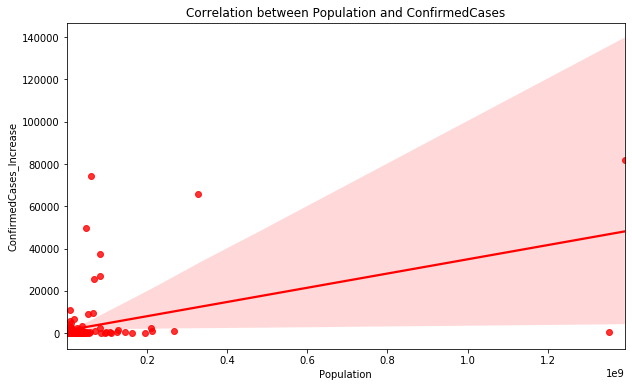

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Population', y='ConfirmedCases_Increase', data=df_all_pop, color='red')
ax.set_title('Correlation between Population and ConfirmedCases')

In [51]:
df_all_pop.corr()

,ConfirmedCases_Increase,Population
ConfirmedCases_Increase,1.000000,0.463079
Population,0.463079,1.000000


As a surprise, there is no strong correlation to COVID-19 spreadness. So, from this dataset, we could conclude that the number of population does not reflect the COVID-19 cases in those particular countries. 

## E. Conclusion

Based on our analysis and visualization earlier, we could conclude that:
1. Until now (25 March 2020), most likely there are no effective treatment for COVID-19. This fact is obtained by the strong correlation between the ConfirmedCases (the actual cases) and Fatalities (deceased).
2. As we know, COVID-19 initial case is located in Wuhan, China. From our analysis, there are 8 Asia countries out of 10 earliest cases of COVID-19 beside China itself. Therefore, we know that countries located closer to China is more likely to be infectious faster. 
3. The earliest infected countries tends to have higher number of cases. 
4. The number of cases tends to increase significantly since 30-50 days after country's first case. So, in order to slowing down the spreadness, the infected country must prepare as soon as possible.
5. Surprisingly, the correlation between COVID-19 cases and total population in particular country is considered very low. Thus, the number of population does not reflect the number of COVID-19's cases in each country.

However, as a disclaimer, we must still assumed that this dataset could be biased because many countries does not apply the thorough testing for its citizen. So it has high possibility that there are so many false negative in this data. 

### About the Authors:

This notebook was written by Ekky Rino Fajar Sakti. He received Bachelor Degree in Computer Science from Ma Chung University. Currently, He is a Data Scientist which helps to build Data Solution for stakeholder. His passion is Data Science, Big Data, and Machine Learning. 
 - Email: ekky.rino@gmail.com
 - LinkedIn: https://www.linkedin.com/in/ekky-rino/